## 0. 분석 목표- 제품 구매 유형별 고객 세그먼트

In [142]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [143]:
df_product = pd.read_csv('/Users/mac/Documents/GitHub/python-training/Modulabs_MainProject5/df_products.csv')
df_orders = pd.read_csv('/Users/mac/Documents/GitHub/python-training/Modulabs_MainProject5/orders.csv')
df_train = pd.read_csv('/Users/mac/Documents/GitHub/python-training/Modulabs_MainProject5/order_products__train.csv')
df_prior = pd.read_csv('/Users/mac/Documents/GitHub/python-training/Modulabs_MainProject5/order_products__prior.csv')

In [144]:
# 제품 정보, 진열대 정보, 품목 정보 확인
display(df_product)

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


In [145]:
# 주문 정보 확인
display(df_orders)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [146]:
# train 데이터 셋
display(df_train)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [147]:
# 과거 주문에 포함된 제품 정보
display(df_prior)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


### 칼럼별 데이터 형태 확인

In [148]:
#df_product 칼럼별 고유값 갯수 확인
display(df_product['product_id'].nunique())
display(df_product['aisle_id'].nunique())
display(df_product['department_id'].nunique())

#df_product 칼럼별 고유값 확인
display(df_product['product_name'].unique())
display(df_product['aisle'].unique())
display(df_product['department'].unique())

49688

134

21

array(['Chocolate Sandwich Cookies', 'All-Seasons Salt',
       'Robust Golden Unsweetened Oolong Tea', ..., 'Artisan Baguette',
       'Smartblend Healthy Metabolism Dry Cat Food',
       'Fresh Foaming Cleanser'], shape=(49688,), dtype=object)

array(['cookies cakes', 'spices seasonings', 'tea', 'frozen meals',
       'marinades meat preparation', 'cold flu allergy', 'juice nectars',
       'frozen produce', 'yogurt', 'water seltzer sparkling water',
       'refrigerated', 'frozen dessert', 'dish detergents',
       'diapers wipes', 'ice cream toppings', 'poultry counter',
       'frozen pizza', 'grains rice dried goods', 'dog food care',
       'oral hygiene', 'packaged poultry', 'vitamins supplements',
       'energy granola bars', 'cat food care', 'body lotions soap',
       'cereal', 'canned jarred vegetables', 'packaged vegetables fruits',
       'chips pretzels', 'dry pasta', 'hot dogs bacon sausage',
       'soup broth bouillon', 'missing', 'energy sports drinks',
       'crackers', 'fresh vegetables', 'frozen breads doughs',
       'asian foods', 'more household', 'tofu meat alternatives',
       'doughs gelatins bake mixes', 'hair care',
       'specialty wines champagnes', 'popcorn jerky',
       'plates bowls cups 

array(['snacks', 'pantry', 'beverages', 'frozen', 'personal care',
       'dairy eggs', 'household', 'babies', 'meat seafood',
       'dry goods pasta', 'pets', 'breakfast', 'canned goods', 'produce',
       'missing', 'international', 'deli', 'alcohol', 'bakery', 'other',
       'bulk'], dtype=object)

In [149]:
#df_orders 칼럼별 고유값 갯수 확인
display(df_orders['order_id'].nunique())
display(df_orders['user_id'].nunique())
display(df_orders['eval_set'].nunique())
display(df_orders['order_number'].nunique())
display(df_orders['order_dow'].nunique())
display(df_orders['order_hour_of_day'].nunique())
display(df_orders['days_since_prior_order'].nunique())

#df_orders['eval_set'] 칼럼별 고유값 갯수 확인
display(df_orders['eval_set'].unique())

3421083

206209

3

100

7

24

31

array(['prior', 'train', 'test'], dtype=object)

In [150]:
# df_prior 칼럼별 고유값 갯수 확인
display(df_prior['order_id'].nunique())
display(df_prior['product_id'].nunique())
display(df_prior['add_to_cart_order'].nunique())
display(df_prior['reordered'].nunique())


3214874

49677

145

2

In [151]:
# department_id별 aisle_id 개수 분석
depart_aisle = df_product.groupby('department_id')['aisle_id']
depart_aisle_count = df_product.groupby('department_id')['aisle_id'].nunique().reset_index()
depart_aisle_count

,department_id,aisle_id
0,1,11
1,2,1
2,3,5
3,4,5
4,5,5
5,6,4
6,7,8
7,8,2
8,9,5
9,10,2


/var/folders/6j/_sljwl6x709323gqwrjb1tn80000gn/T/ipykernel_75155/3362730181.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=depart_aisle_count['department_id'], y=depart_aisle_count['aisle_id'], palette=palette)


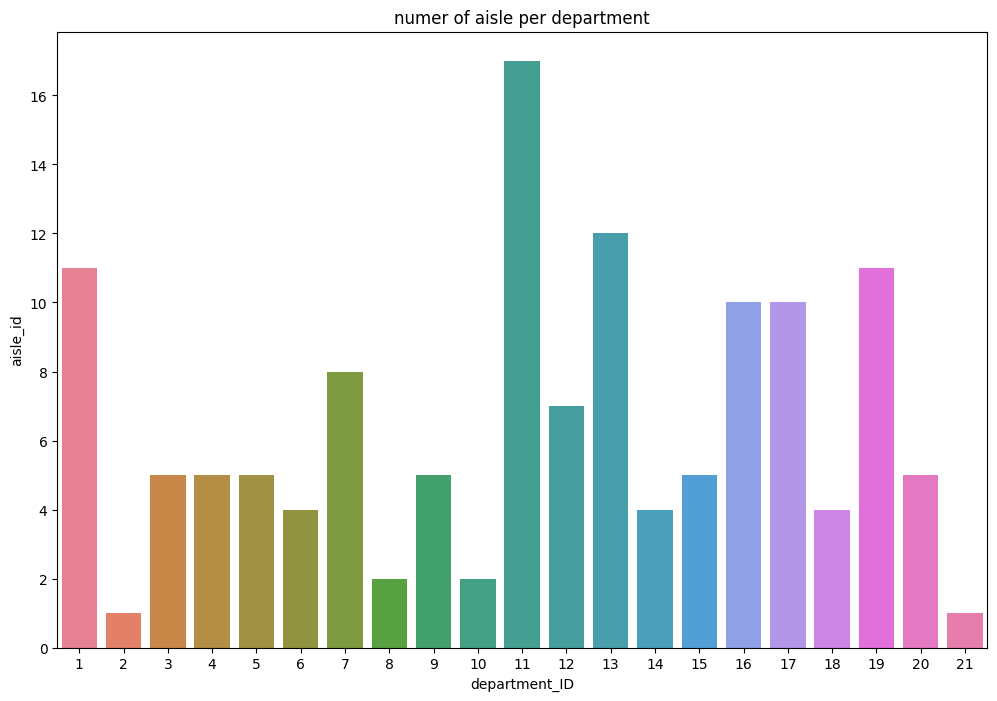

In [152]:
# department_id별 aisle_id 개수 시각화

# 바플롯 크기 설정
plt.figure(figsize=(12, 8))

# 바플롯 컬러 설정
palette = sns.color_palette("husl", n_colors=21)

# 바플롯 그리기
sns.barplot(x=depart_aisle_count['department_id'], y=depart_aisle_count['aisle_id'], palette=palette)

plt.xlabel("department_ID")
plt.ylabel("aisle_id")
plt.title('numer of aisle per department')
plt.show()

In [153]:
# department_id 대비 aisle_id 내 제품 개수 분석
# department_id내 aisle_id별 product_id 갯수 분석 -> department별 제품 다양성(갯수) 확인
department_aisle_product_count = df_product.groupby(["department", "aisle_id"])["product_id"].count().reset_index()
department_aisle_product_count

,department,aisle_id,product_id
0,alcohol,27,385
1,alcohol,28,232
2,alcohol,62,147
3,alcohol,124,195
4,alcohol,134,95
...,...,...,...
129,snacks,78,747
130,snacks,103,85
131,snacks,107,989
132,snacks,117,582


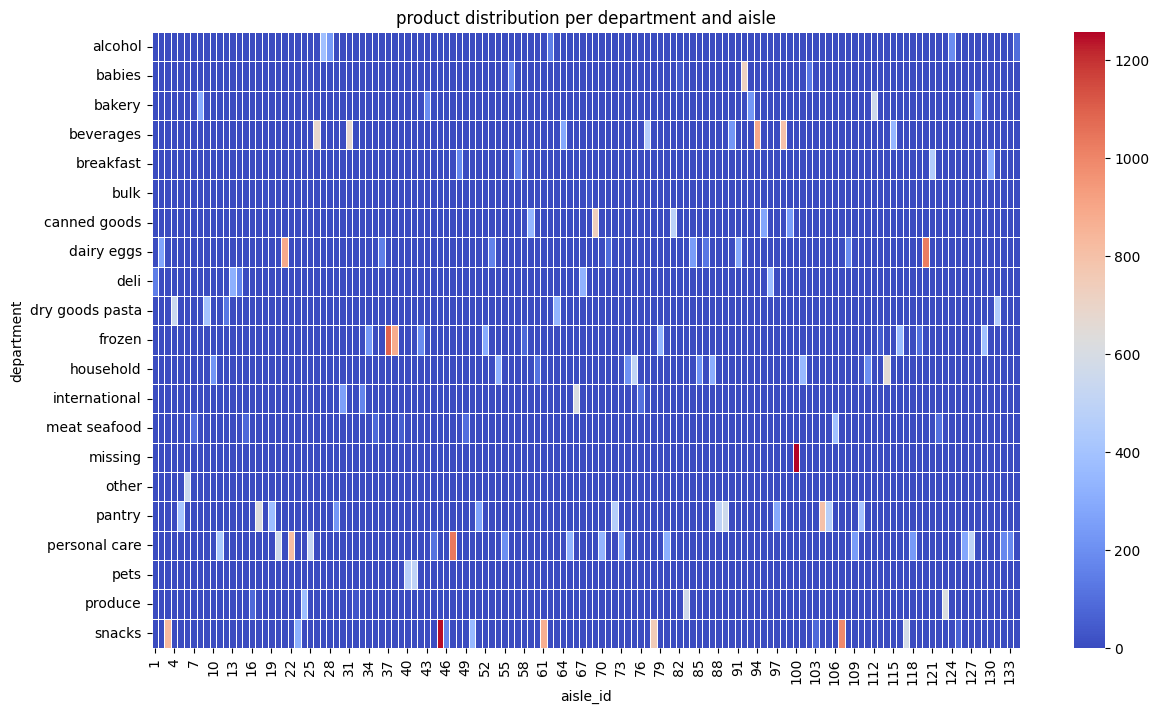

In [157]:
# pivot으로 문자열 -> 인덱스 index 변경
df_heatmap_pivot = department_aisle_product_count.pivot(index="department", columns="aisle_id", values="product_id").fillna(0)

# 히트맵 크기 설정
plt.figure(figsize=(14, 8))

# Seaborn 히트맵 그리기
sns.heatmap(df_heatmap_pivot, cmap="coolwarm", linewidths=0.5, annot=False)

plt.xlabel("aisle_id")
plt.ylabel("department")
plt.title("product distribution per department and aisle")
plt.show()


## 문제 정의   
### eda 주요 패턴 :   
#### 1. 대부분의 department에서 특정 aisle_id에만 제품이 있음 -> 특정 aisle만 중요한 역할을 함   
#### 2. 일부 aisle_id에만 붉은색 집중 -> 몇몇 aisle에만 제품수가 엄청 몰림
#### 3. "missing" "other" 카테고리 있음 -> 제대로 분류안된 제품이 있음   
#### 4. department 갯수에 비해 aisle 개수가 너무 많음   
### 문제정의 : 구매 유형에 따라 머신러닝을 통해 aisle 데이터를 기반으로 department 제품 카테고리 재분류   
### 사용기법 : PCA, K-means clustering

In [160]:
missing_products = df_product[df_product["department"] == "missing"]
display(missing_products[["product_id", "product_name", "aisle"]])  # 상위 20개 출력


,product_id,product_name,aisle
37,38,Ultra Antibacterial Dish Liquid,missing
71,72,Organic Honeycrisp Apples,missing
109,110,Uncured Turkey Bologna,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",missing
416,417,Classics Baby Binks Easter Chocolate Bunny,missing
...,...,...,...
49552,49553,Organic Plain Skyr,missing
49574,49575,Chocolate Vanilla Malt Custard,missing
49640,49641,"8\"" Pecan Pie",missing
49663,49664,Lemon Cayenne Drinking Vinegar,missing


In [161]:
missing_product_count = missing_products["product_id"].count()
print(f"Missing 카테고리에 속한 전체 제품 개수: {missing_product_count}")

Missing 카테고리에 속한 전체 제품 개수: 1258


In [162]:
# 📌 전체 제품 개수 (중복 포함)
total_product_count = df_product["product_id"].count()

# 📌 "missing" 카테고리에 속한 제품 개수 (중복 포함)
missing_product_count = missing_products["product_id"].count()

# 📌 비율 계산
missing_percentage = (missing_product_count / total_product_count) * 100

# 📌 결과 출력
print(f"Missing 카테고리에 속한 전체 제품 개수: {missing_product_count}")
print(f"전체 제품 개수: {total_product_count}")
print(f"Missing 카테고리가 전체 제품에서 차지하는 비율: {missing_percentage:.2f}%")

Missing 카테고리에 속한 전체 제품 개수: 1258
전체 제품 개수: 49688
Missing 카테고리가 전체 제품에서 차지하는 비율: 2.53%


## 1. df_product의 aisle 분류를 머신러닝을 통해 자동으로 카테고라이징

In [ ]:
display(df_product.isna().sum())
display(df_orders.isna().sum())
display(df_train.isna().sum())
display(df_prior.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
aisle            0
department       0
dtype: int64

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [ ]:
orders = df_orders.copy() 
missing_columns = missing_data = orders[orders.isnull().any(axis=1)]
missing_columns

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN
...,...,...,...,...,...,...,...
3420930,969311,206205,prior,1,4,12,NaN
3420934,3189322,206206,prior,1,3,18,NaN
3421002,2166133,206207,prior,1,6,19,NaN
3421019,2227043,206208,prior,1,1,15,NaN


In [ ]:
zero_columns = df_orders[df_orders["days_since_prior_order"] == 0]
zero_columns

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
8,2295261,1,prior,9,1,16,0.0
43,2557754,4,prior,5,5,13,0.0
189,2148135,17,prior,30,6,15,0.0
296,965160,24,train,19,0,16,0.0
337,3162630,27,prior,24,2,15,0.0
...,...,...,...,...,...,...,...
3420980,4277,206206,prior,47,2,17,0.0
3420985,648225,206206,prior,52,0,19,0.0
3420991,2475308,206206,prior,58,0,15,0.0
3421001,1043943,206206,test,68,0,20,0.0


In [ ]:
missing_columns['days_since_prior_order'] = missing_columns['days_since_prior_order'].fillna(-1)
missing_columns

/var/folders/6j/_sljwl6x709323gqwrjb1tn80000gn/T/ipykernel_75155/2862394668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_columns['days_since_prior_order'] = missing_columns['days_since_prior_order'].fillna(-1)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,-1.0
11,2168274,2,prior,1,2,11,-1.0
26,1374495,3,prior,1,1,14,-1.0
39,3343014,4,prior,1,6,11,-1.0
45,2717275,5,prior,1,3,12,-1.0
...,...,...,...,...,...,...,...
3420930,969311,206205,prior,1,4,12,-1.0
3420934,3189322,206206,prior,1,3,18,-1.0
3421002,2166133,206207,prior,1,6,19,-1.0
3421019,2227043,206208,prior,1,1,15,-1.0


In [ ]:
# 분석 목표 (구매 행동 기반 세그먼트)
# 고객이 자주 사는 제품 유형으로 분류 -> df_product.csv